## Review criteria

Решение должно представлять собой IPython-ноутбук, содержащий:

- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

---

# Распределение Парето

[wiki](https://ru.wikipedia.org/wiki/Распределение_Парето)  
[scipy_manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto)  


#### Функция распределения:

$F_x (x) = P(X < x) = 1 - \left( \dfrac {x_m}{x}  \right )^k, \forall x \geq x_m  $


#### Плотность распределения:

$ f_x (x) = \begin{cases}
                \dfrac {kx_m^k}{x^{k+1}}, & \text{если $ x \geq x_m $} \\
                0,  & \text{если $x < x_m $}
            \end{cases}
$

#### Матожидание:

$\mathbb{E}\left[X\right]= \dfrac {kx_m}{k-1},  k > 1 $

#### Дисперсия:

$D\left[X\right]= \left(\dfrac {x_m}{k-1} \right )^2 \dfrac {k}{k-2}, k > 2 $



In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [308]:
# Параметры распределения
shape = 10 # в формулах выше - параметр k

# Генерация выборки (если функция принимает только один параметр, то ${x_m}=1$)
pareto_rv = sts.pareto(shape)


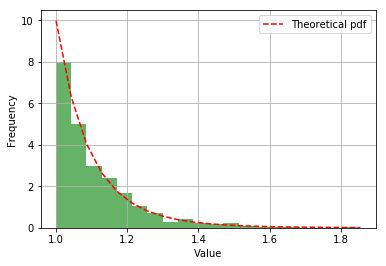

In [330]:
pdf = pareto_rv.rvs(size=1000)
n, bins, patches = plt.hist(pdf, 20, normed=1, facecolor='green', alpha=0.6)
plt.xlabel('Value')
plt.ylabel('Frequency')

pdf = pareto_rv.pdf(bins) #значения функции распределения для вектора точек
plt.plot(bins, pdf, 'r--', label="Theoretical pdf") 
plt.legend()
plt.grid()


In [349]:
# Расчет теоретических параметров распределения для приближения выборочных средних

n1 = 5
n2 = 10
n3 = 100

EX = float((shape * 1) / float(shape - 1))
print 'EX =', float(EX)

DX = (1 / float (shape - 1))**2 * float (shape) / float (shape - 2)

print 'DX =', DX


EX = 1.11111111111
DX = 0.0154320987654


mu =  1.11111111111
sigma =  0.0555555555556


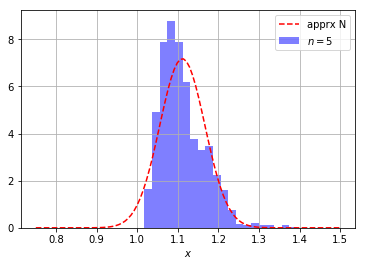

In [352]:
sample_mean_n1 = []

# Генерация 1000 выборок объема n1
for i in range (0, 1000):
    tmp = pareto_rv.rvs(n1)
    sample_mean_n1.append(sum(tmp)/n1)

# Гистограмма выборочных средних
n, bins, patches = plt.hist(sample_mean_n1, 20, normed=True, facecolor='blue', alpha=0.5, label="$n=%s$" % n1)

# Среднеквадратичное отклонение (по ЦПТ)
sigma = (DX/n1)**0.5

print 'mu = ', EX
print 'sigma = ', sigma

# Аппроксимирующее нормальное распределение
x = np.linspace (0.75,1.5,100)
norm_rv = sts.norm (EX, sigma)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'r--', label="apprx N") 

plt.xlabel('$x$')
plt.legend()
plt.grid()

mu =  1.11111111111
sigma =  0.0392837100659


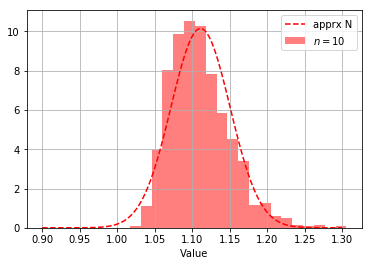

In [342]:
sample_mean_n2 = []

for i in range (0, 1000):
    tmp = pareto_rv.rvs(n2)
    sample_mean_n2.append(sum(tmp)/n2)
    
n, bins, patches = plt.hist(sample_mean_n2, 20, normed = 1, facecolor='red', alpha=0.5, label="$n=%s$" % n2)
plt.xlabel('Value')
plt.legend()

sigma = (DX/n2)**0.5

print 'mu = ', EX
print 'sigma = ', sigma

x = np.linspace (0.9,1.3,100)

norm_rv = sts.norm (EX, sigma)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'r--', label="apprx N") 
plt.legend()
plt.grid()

mu =  1.11111111111
sigma =  0.012422599875


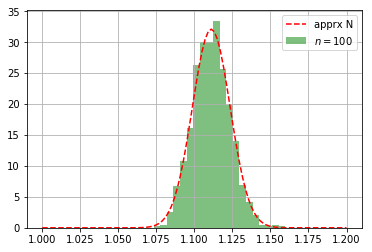

In [343]:
sample_mean_n3 = []

for i in range (0, 1000):
    tmp = pareto_rv.rvs(n3)
    sample_mean_n3.append(sum(tmp)/n3)
    
n, bins, patches = plt.hist(sample_mean_n3, 20, normed=True, facecolor='green', alpha=0.5, label="$n=%s$" % n3)
plt.legend()

sigma = (DX/n3)**0.5

print 'mu = ', EX
print 'sigma = ', sigma

x = np.linspace (1,1.2,100)

norm_rv = sts.norm (EX, sigma)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'r--', label="apprx N") 
plt.legend()
plt.grid()

#### Вывод: 
при увеличении размера выборки, распределение выборочных средних приближается к нормальному распределению